# Import libraries

In [67]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, recall_score, f1_score, accuracy_score, precision_score
from sklearn.model_selection import train_test_split , cross_val_score, RandomizedSearchCV
import warnings  
warnings.filterwarnings('ignore')
import pandas as pd
from tabulate import tabulate

# Predict Customer Churn using Machine Learning in the Banking Sector

## Logistic Regression

In [42]:
y_train = pd.read_csv('../Dataset/y_train.csv')
x_train = pd.read_csv('../Dataset/x_train.csv')

y_test = pd.read_csv('../Dataset/y_test.csv')
x_test = pd.read_csv('../Dataset/x_test.csv')

### Model Building

In [44]:
clf_lr = LogisticRegression(random_state=0) 
clf_lr.fit(x_train, y_train)                
pred = clf_lr.predict(x_test)                

acc  = accuracy_score(y_test, pred)  
f1   = f1_score(y_test, pred)         
rec  = recall_score(y_test, pred)     
prec = precision_score(y_test, pred)
cm   = confusion_matrix(y_test, pred) 

lr_results = pd.DataFrame([['Logistic Regression', acc, f1, rec, prec]],
                      columns=['Model', 'Accuracy_Score', 'F1_Score', 'Recall_Score', 'Precision_Score'])

lr_results

,Model,Accuracy_Score,F1_Score,Recall_Score,Precision_Score
0,Logistic Regression,0.72,0.494,0.697,0.383


### Confusion Matrix

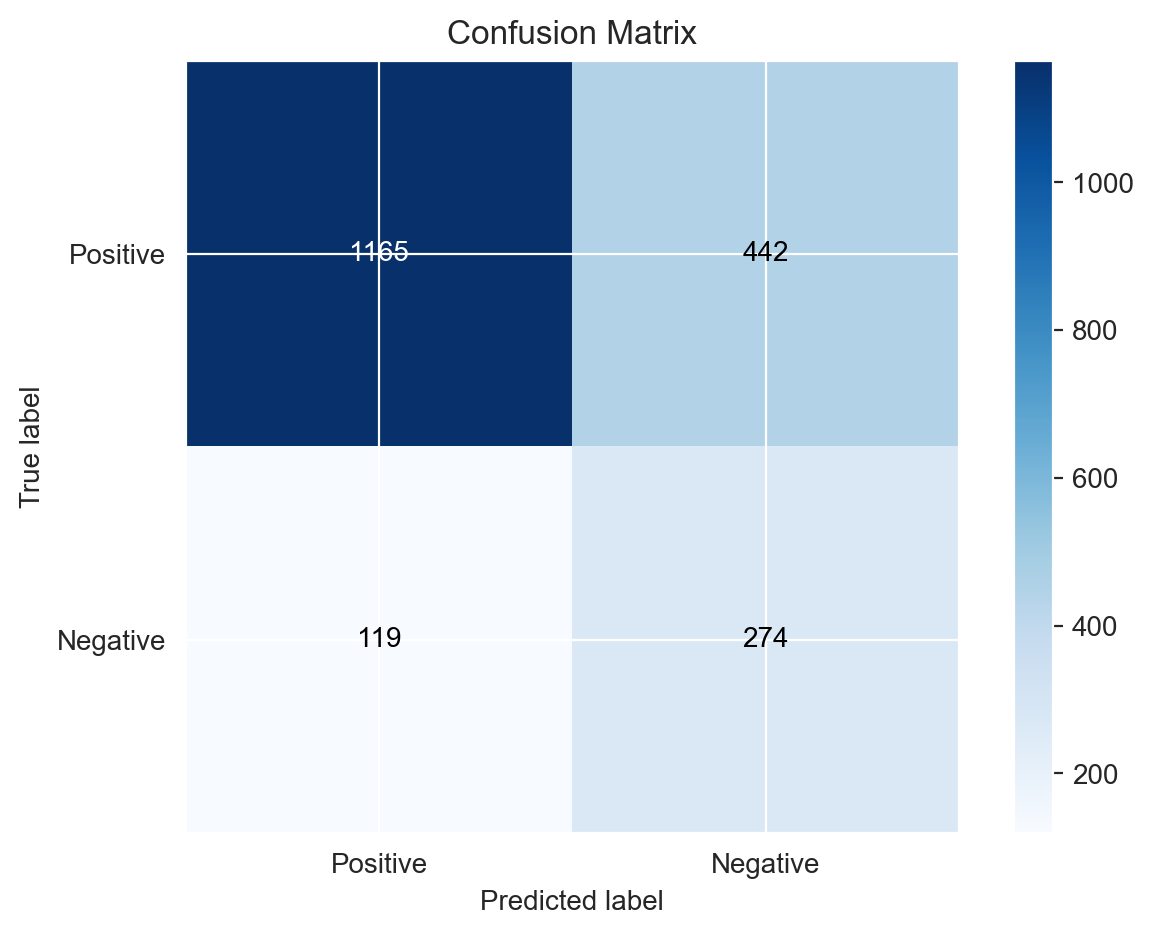

In [45]:
class_names = ['Positive', 'Negative']
cm = confusion_matrix(y_test, pred)

fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=class_names, yticklabels=class_names,
       title='Confusion Matrix',
       ylabel='True label',
       xlabel='Predicted label')

thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j]),
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black")
fig.tight_layout()
plt.show()

### Cross validation

In [47]:
accuracies = cross_val_score(estimator=clf_lr, X=x_train, y=y_train, cv=10) 
print(f'Accuracy is:', format(accuracies.mean()*100))  
print(f'Standard Deviation is:',format(accuracies.std()*100)) 

Accuracy is: 70.29600200901582
Standard Deviation is: 1.332807733643219


## Random Forest

### Model Building

In [48]:
clf_rf = RandomForestClassifier(random_state=0)
clf_rf.fit(x_train, y_train)                   
pred = clf_rf.predict(x_test)                  

acc  = accuracy_score(y_test, pred)  
f1   = f1_score(y_test, pred)        
rec  = recall_score(y_test, pred)     
prec = precision_score(y_test, pred)  
cm   = confusion_matrix(y_test, pred) 

rf_results = pd.DataFrame([['Random Forest Classifier', acc, f1, rec, prec]],
                      columns=['Model', 'Accuracy_Score', 'F1_Score', 'Recall_Score', 'Precision_Score'])

results = pd.concat([lr_results, rf_results], ignore_index=True)

results

,Model,Accuracy_Score,F1_Score,Recall_Score,Precision_Score
0,Logistic Regression,0.720,0.494,0.697,0.383
1,Random Forest Classifier,0.827,0.579,0.608,0.553


### Confusion Matrix

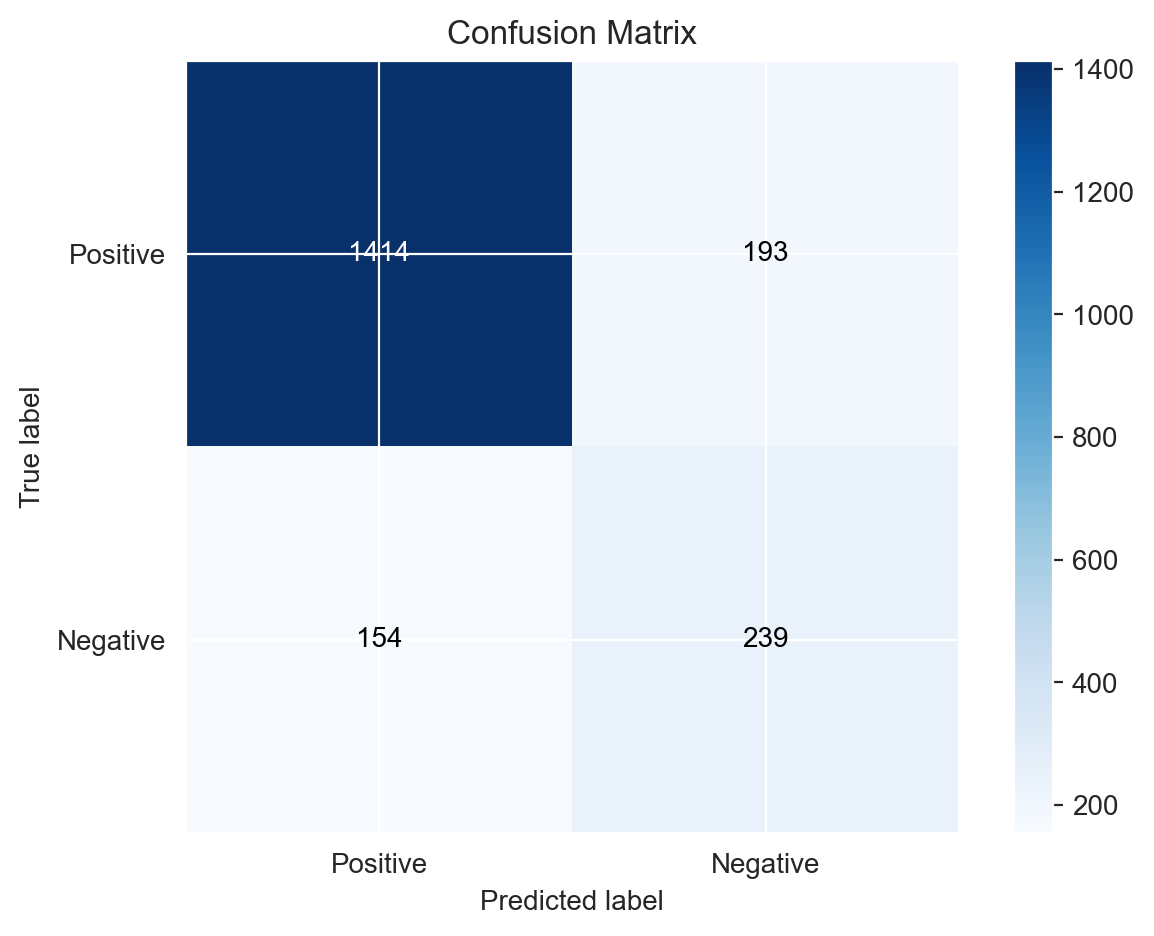

In [49]:
class_names = ['Positive', 'Negative']
cm = confusion_matrix(y_test, pred)

fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=class_names, yticklabels=class_names,
       title='Confusion Matrix',
       ylabel='True label',
       xlabel='Predicted label')

thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j]),
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black")
fig.tight_layout()
plt.show()

### Cross Validation

In [50]:
accuracies = cross_val_score(estimator=clf_rf, X=x_train, y=y_train, cv=10) 
print(f'Accuracy is:', format(accuracies.mean()*100))  
print(f'Standard Deviation is:',format(accuracies.std()*100))

Accuracy is: 88.24793160439214
Standard Deviation is: 2.571921000295524


## XGBoost

### Model Building

In [51]:
clf_gx = XGBClassifier()    
clf_gx.fit(x_train, y_train)
pred = clf_gx.predict(x_test) 

acc  = accuracy_score(y_test, pred)   
f1   = f1_score(y_test, pred)       
rec  = recall_score(y_test, pred)    
prec = precision_score(y_test, pred) 
cm   = confusion_matrix(y_test, pred)

xg_results = pd.DataFrame([['GXboost', acc, f1, rec, prec]],
                      columns=['Model', 'Accuracy_Score', 'F1_Score', 'Recall_Score', 'Precision_Score'])
results = pd.concat([xg_results, results], ignore_index=True)

results

,Model,Accuracy_Score,F1_Score,Recall_Score,Precision_Score
0,GXboost,0.854,0.608,0.575,0.644
1,Logistic Regression,0.720,0.494,0.697,0.383
2,Random Forest Classifier,0.827,0.579,0.608,0.553


### Confusion Matrix

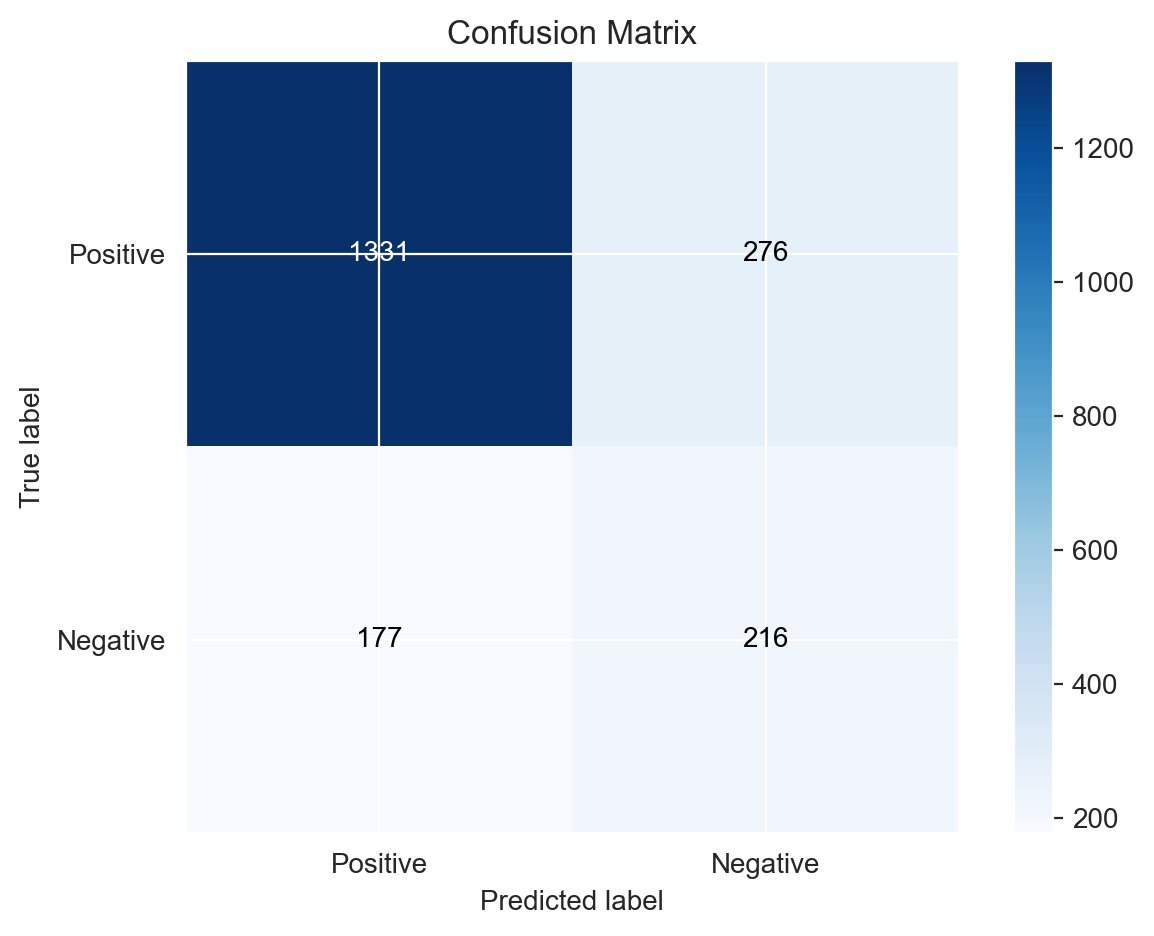

In [64]:
class_names = ['Positive', 'Negative']
cm = confusion_matrix(y_test, pred)

fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=class_names, yticklabels=class_names,
       title='Confusion Matrix',
       ylabel='True label',
       xlabel='Predicted label')

thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j]),
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black")
fig.tight_layout()
plt.show()

### Cross Validation

In [54]:
accuracies = cross_val_score(estimator=clf_gx, X=x_train, y=y_train, cv=10) 
print(f'Accuracy is:', format(accuracies.mean()*100))  
print(f'Standard Deviation is:',format(accuracies.std()*100))

Accuracy is: 88.96525169603493
Standard Deviation is: 7.318191948756125


## Decision Tree

### Model Building

In [63]:
clf_dt = DecisionTreeClassifier()    
clf_dt.fit(x_train, y_train)
pred = clf_dt.predict(x_test) 

acc  = accuracy_score(y_test, pred)   
f1   = f1_score(y_test, pred)       
rec  = recall_score(y_test, pred)    
prec = precision_score(y_test, pred) 
cm   = confusion_matrix(y_test, pred)

dt_results = pd.DataFrame([['Decision Tree', acc, f1, rec, prec]],
                      columns=['Model', 'Accuracy_Score', 'F1_Score', 'Recall_Score', 'Precision_Score'])
results = pd.concat([dt_results, results], ignore_index=True)

results

,Model,Accuracy_Score,F1_Score,Recall_Score,Precision_Score
0,Decision Tree,0.773,0.488,0.550,0.439
1,Final Hypertuned Random Forest Classifier,0.720,0.494,0.697,0.383
2,GXboost,0.854,0.608,0.575,0.644
3,GXboost,0.854,0.608,0.575,0.644
4,Logistic Regression,0.720,0.494,0.697,0.383
5,Random Forest Classifier,0.827,0.579,0.608,0.553


### Confusion Matrix

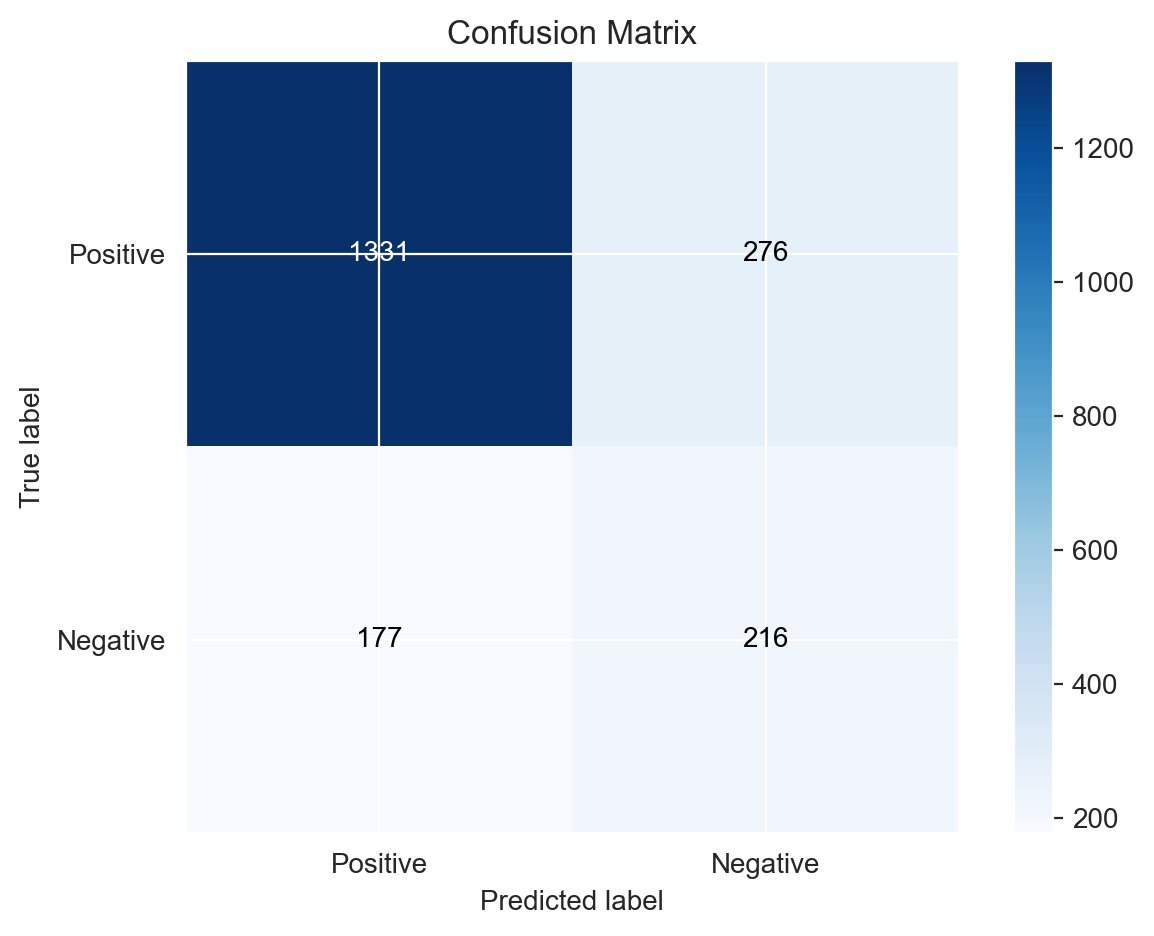

In [65]:
class_names = ['Positive', 'Negative']
cm = confusion_matrix(y_test, pred)

fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=class_names, yticklabels=class_names,
       title='Confusion Matrix',
       ylabel='True label',
       xlabel='Predicted label')

thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j]),
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black")
fig.tight_layout()
plt.show()

### Cross Validation

In [66]:
accuracies = cross_val_score(estimator=clf_dt, X=x_train, y=y_train, cv=10) 
print(f'Accuracy is:', format(accuracies.mean()*100))  
print(f'Standard Deviation is:',format(accuracies.std()*100))

Accuracy is: 83.11164882799163
Standard Deviation is: 4.386450689654717


## KNN

### Model Building

In [68]:
clf_knn = KNeighborsClassifier()  
clf_knn.fit(x_train, y_train)
pred = clf_knn.predict(x_test) 

acc  = accuracy_score(y_test, pred)   
f1   = f1_score(y_test, pred)       
rec  = recall_score(y_test, pred)    
prec = precision_score(y_test, pred) 
cm   = confusion_matrix(y_test, pred)

knn_results = pd.DataFrame([['KNN', acc, f1, rec, prec]],
                      columns=['Model', 'Accuracy_Score', 'F1_Score', 'Recall_Score', 'Precision_Score'])
results = pd.concat([knn_results, results], ignore_index=True)

results

,Model,Accuracy_Score,F1_Score,Recall_Score,Precision_Score
0,KNN,0.771,0.545,0.697,0.448
1,Decision Tree,0.773,0.488,0.550,0.439
2,Final Hypertuned Random Forest Classifier,0.720,0.494,0.697,0.383
3,GXboost,0.854,0.608,0.575,0.644
4,GXboost,0.854,0.608,0.575,0.644
5,Logistic Regression,0.720,0.494,0.697,0.383
6,Random Forest Classifier,0.827,0.579,0.608,0.553


### Confusion Matrix

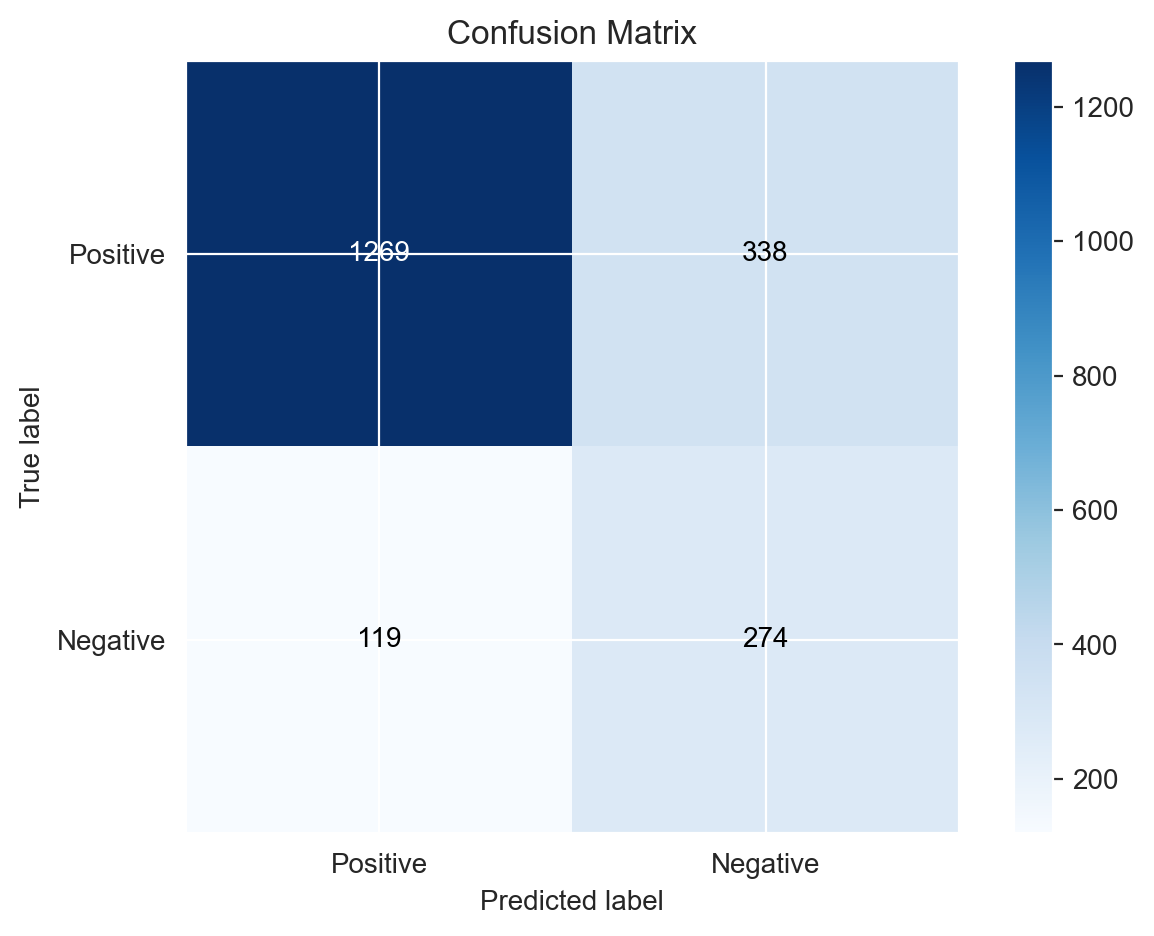

In [69]:
class_names = ['Positive', 'Negative']
cm = confusion_matrix(y_test, pred)

fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=class_names, yticklabels=class_names,
       title='Confusion Matrix',
       ylabel='True label',
       xlabel='Predicted label')

thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j]),
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black")
fig.tight_layout()
plt.show()

### Cross Validation

In [70]:
accuracies = cross_val_score(estimator=clf_knn, X=x_train, y=y_train, cv=10) 
print(f'Accuracy is:', format(accuracies.mean()*100))  
print(f'Standard Deviation is:',format(accuracies.std()*100))

Accuracy is: 84.2671731266917
Standard Deviation is: 1.8374922251955477


# Random Search to Find the best parameters for Random Forest

In [71]:
params = {'n_estimators':[100, 130, 160, 150, 140, 120, 165, 155, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800, 850, 900, 1000],
          'criterion': ['gini', 'entropy', 'log_loss'],
          'max_features': ['sqrt', 'log2', 'none', 'auto', '0.1', '0.2', '0.3', '0.4', '0.5'],
          'bootstrap': [True, False],
          'oob_score': [True, False],
          'warm_start': [True, False],
          'max_depth': [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25],
          'min_samples_split': [0.01, 0.05, 0.10, 0.25, 0.33, 0.5, 0.75, 1, 2, 2.5, 3, 3.5, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25, 30, 35, 40, 50, 60, 70, 80, 90, 100, 'none'],
          'min_samples_leaf': [0.01, 0.05, 0.10, 0.25, 0.33, 0.5, 0.75, 1, 2, 3, 3.5, 4, 4.5, 5, 6, 7, 8, 9, 10, 15, 20, 25, 30, 35, 40, 50, 60, 70, 80, 90, 100, 'none']}

rand_search = RandomizedSearchCV(estimator=clf_rf,
                                param_distributions=params,
                                n_iter=100,
                                scoring='roc_auc',
                                n_jobs=-1,
                                cv=5,
                                verbose=3)

rand_search.fit(x_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [None, 1, 2, 3, 4, 5, 6, 7,
                                                      8, 9, 10, 11, 12, 13, 14,
                                                      15, 16, 17, 18, 19, 20,
                                                      21, 22, 23, 24, 25],
                                        'max_features': ['sqrt', 'log2', 'none',
                                                         'auto', '0.1', '0.2',
                                                         '0.3', '0.4', '0.5'],
                                        'min_sam...
                                                             9, 10, 15, 20, 25,
                                                             30, 35, 40, 50, 60,
                                                             70, 80, 90, ...],
                                        'min_samples_split': [0.01, 0.05, 0.1,
                                                              0.25, 0.33, 0.5,
                                                              0.75, 1, 2, 2.5,
                                                              3, 3.5, 4, 5, 6,
                                                              7, 8, 9, 10, 15,
                                                              20, 25, 30, 35,
                                                              40, 50, 60, 70,
                                                              80, 90, ...],
                                        'n_estimators': [100, 130, 160, 150,
                                                         140, 120, 165, 155,
                                                         200, 250, 300, 350,
                                                         400, 450, 500, 550,
                                                         600, 650, 700, 750,
                                                         800, 850, 900, 1000],
                                        'oob_score': [True, False],
                                        'warm_start': [True, False]},
                   scoring='roc_auc', verbose=3)

In [72]:
print(f'Best Est:  ',rand_search.best_estimator_)
print(f'Best Score: ',rand_search.best_score_)
print(f'Best Params: ', rand_search.best_params_)

Best Est:   RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=17,
                       max_features='log2', min_samples_leaf=6,
                       min_samples_split=10, n_estimators=200, random_state=0)
Best Score:  0.9363581516259366
Best Params:  {'warm_start': False, 'oob_score': False, 'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 6, 'max_features': 'log2', 'max_depth': 17, 'criterion': 'entropy', 'bootstrap': False}


# Final Model

In [74]:
final_clf = RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=17,
                       min_samples_leaf=6, min_samples_split=10,
                       n_estimators=200, random_state=0, warm_start=False, oob_score=False, max_features='log2')
final_clf.fit(x_train, y_train)           
pred = clf_lr.predict(x_test)               

acc  = accuracy_score(y_test, pred) 
f1   = f1_score(y_test, pred)        
rec  = recall_score(y_test, pred)  
prec = precision_score(y_test, pred)  
cm   = confusion_matrix(y_test, pred) 

model_results = pd.DataFrame([['Final Hypertuned Random Forest Classifier', acc, f1, rec, prec]],
                      columns=['Model', 'Accuracy_Score', 'F1_Score', 'Recall_Score', 'Precision_Score'])

results = pd.concat([model_results, results], ignore_index=True)

results

,Model,Accuracy_Score,F1_Score,Recall_Score,Precision_Score
0,Final Hypertuned Random Forest Classifier,0.720,0.494,0.697,0.383
1,Final Hypertuned Random Forest Classifier,0.720,0.494,0.697,0.383
2,KNN,0.771,0.545,0.697,0.448
3,Decision Tree,0.773,0.488,0.550,0.439
4,Final Hypertuned Random Forest Classifier,0.720,0.494,0.697,0.383
5,GXboost,0.854,0.608,0.575,0.644
6,GXboost,0.854,0.608,0.575,0.644
7,Logistic Regression,0.720,0.494,0.697,0.383
8,Random Forest Classifier,0.827,0.579,0.608,0.553


### Printing Confusion Matrix

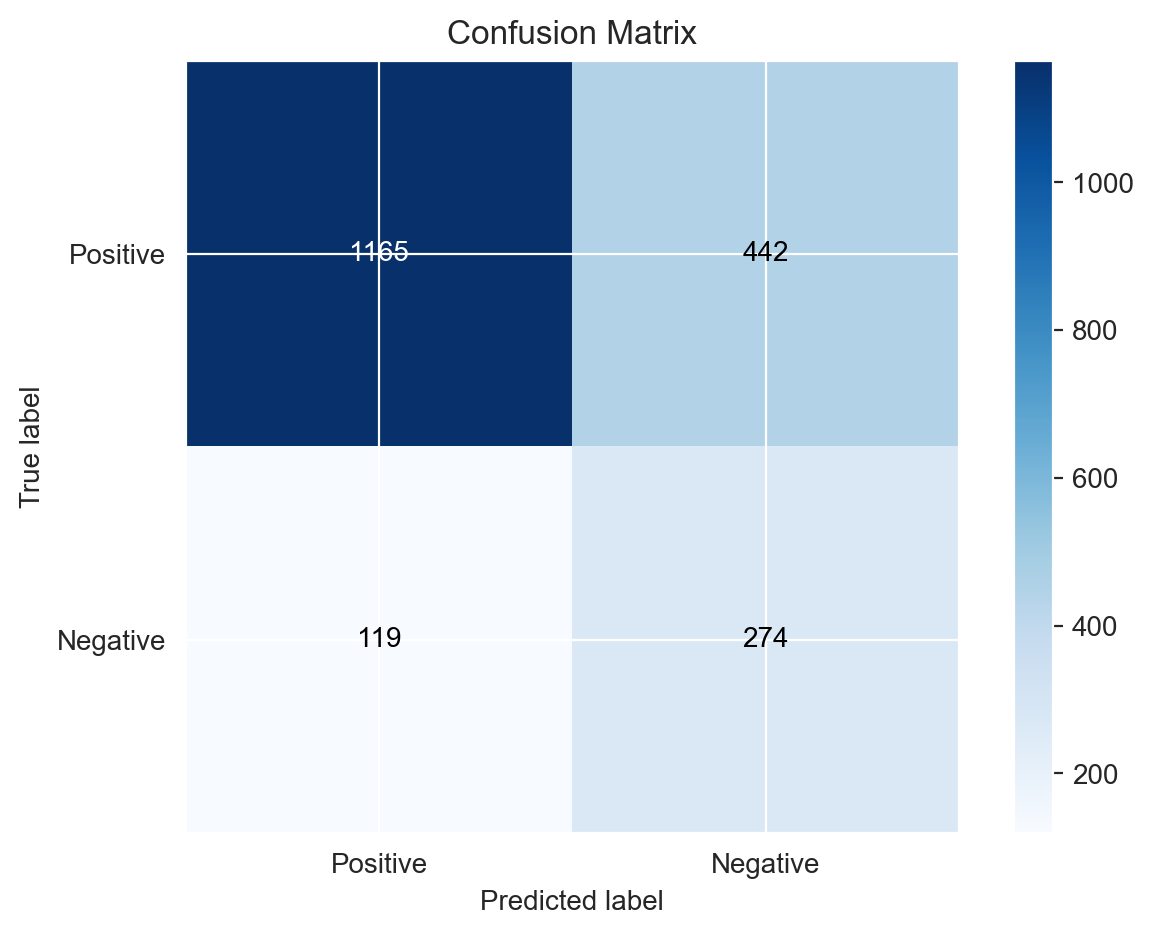

In [75]:
class_names = ['Positive', 'Negative']
cm = confusion_matrix(y_test, pred)

fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=class_names, yticklabels=class_names,
       title='Confusion Matrix',
       ylabel='True label',
       xlabel='Predicted label')

thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j]),
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black")
fig.tight_layout()
plt.show()

### Cross Validation

In [76]:
accuracies = cross_val_score(estimator=final_clf, X=x_train, y=y_train, cv=10) 
print(f'Accuracy is:', format(accuracies.mean()*100)) 
print(f'Standard Deviation is:',format(accuracies.std()*100)) 

Accuracy is: 86.7296772709054
Standard Deviation is: 2.5468749448512185


----------------